## SVM
- Support Vector Machine.
- Supervised ML Model.
- Use to solve both classification & regression model.
- <b>SVR </b>When dealing with Regression.
- <b>SVC </b>When dealing with Classification.
- It can also handle non-linear data which was not handled in linear and logistic regression
#### Goal of SVM
- The goal of SVM is to create a best best line or a hyperplane that segregates data into different classes.
- The line which segregates data into different classes is called hyperplane.
#### Working of SVM
- Let say we have a dataset that has two classes e.g:- [1, 0] , [yes, no].
- We'll plot a graph (scatterplot) and try to find a bestfit hyperplane which seperates the data clearly.
- Challenge in SVM is to find the best hyperplane out of all the possible hyperplanes.
- <b>Deciding best hyperplane: </b> let suppose we have two hyperplanes A and B.
formula of hyperplane(line) = y = m(transpose)x+c or w(transpose)x+c
    1. Choose the points near to the hyperplane.
    2. The closest points to the hyperplane is called Support Vector.
    3. We will be drawing a line over the support vector points parallel to the hyperplane, this line is called <b>marginal line</b>.
    4. You need to find the distance b/w the hyperplane & support vector. This distance is called <b>marginal distance</b>.
    5. We will select that hyperplane which gives maximum marginal distance
#### Types of SVM
- There are two types of SVM:
    1. Linear SVM
    2. Non-Linear SVM: not clear seperation of data. Datapoints will be overlapping.
    
---------------------------


#### Kernals:
- These are the mathematical functions that transforms non-linear data into a linear data by connecting lower dimensional data into high dimensional data. It basically increase the dimensions.

----------------------------

#### Example
X  Y
-1 -ve
-2 +ve
-3 +ve
+1 -ve
+2 -ve
+3 +ve

-3___-2___-1___0___1___2___3_+ve

so we convert the above 1-dimensional data into 2-Dimensional data.

X Y=X^2
-1  1
-2  4
-3  9
+1  1
+2  4
+3  9
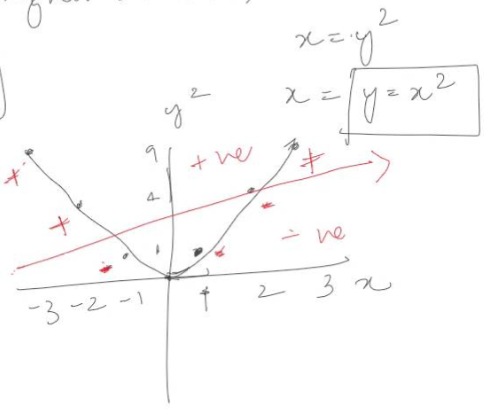

#### Types of Kernals
1. y=x^2
2. Sigmoid
    - h(x) = 1/1+e^-z
3. Exponintials Kernals
    - y=e^x
4. RBF
    - Radial Basis Function
    - F(x, xi) = exp(-gamma|x-xi|^2)
    - gamma is a parameter that tells about the the squard distance b/w the 2 observations are varying.
    - <b>Read -></b> https://towardsdatascience.com/kernel-function-6f1d2be6091

## Code
Business Case: User relevant ML model to predict whether the loan will get approved or not

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('loan_approved.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#renaming the target column to simplify it
data.rename(columns={"Loan_Status (Approved)":"Loan_Status"}, inplace=True)

### Basic Checks

In [8]:
data.shape

(614, 13)

In [9]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
#fetch the numerical column
num_col = data.select_dtypes(include=["int64", "float64"]).columns
num_col

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [12]:
#fetch the categorical columns
cat_col = data.select_dtypes(include=["object"])
cat_col.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
#find unique categories in categorical columns
for i in cat_col.drop("Loan_ID", axis=1):
    print(i, data[i].unique())
    print(data[i].value_counts())
    print("**********************")

Gender ['Male' 'Female' nan]
Male      489
Female    112
Name: Gender, dtype: int64
**********************
Married ['No' 'Yes' nan]
Yes    398
No     213
Name: Married, dtype: int64
**********************
Dependents ['0' '1' '2' '3+' nan]
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
**********************
Education ['Graduate' 'Not Graduate']
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
**********************
Self_Employed ['No' 'Yes' nan]
No     500
Yes     82
Name: Self_Employed, dtype: int64
**********************
Property_Area ['Urban' 'Rural' 'Semiurban']
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
**********************
Loan_Status ['Y' 'N']
Y    422
N    192
Name: Loan_Status, dtype: int64
**********************


In [15]:
data.describe().T #statistical report for numerical data

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [22]:
data.describe(include='O').T #statistical report for numerical data

,count,unique,top,freq
Loan_ID,614,614,LP001002,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


### EDA
#### Univarite Analysis

In [28]:
!pip install sweetviz

In [29]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html('myreport.html')

                                             |      | [  0%]   00:00 -> (? left)

Report myreport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [31]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [32]:
#create df of categorical data
df_cat=data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']]
df_num=data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]

In [33]:
df_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban


In [34]:
df_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


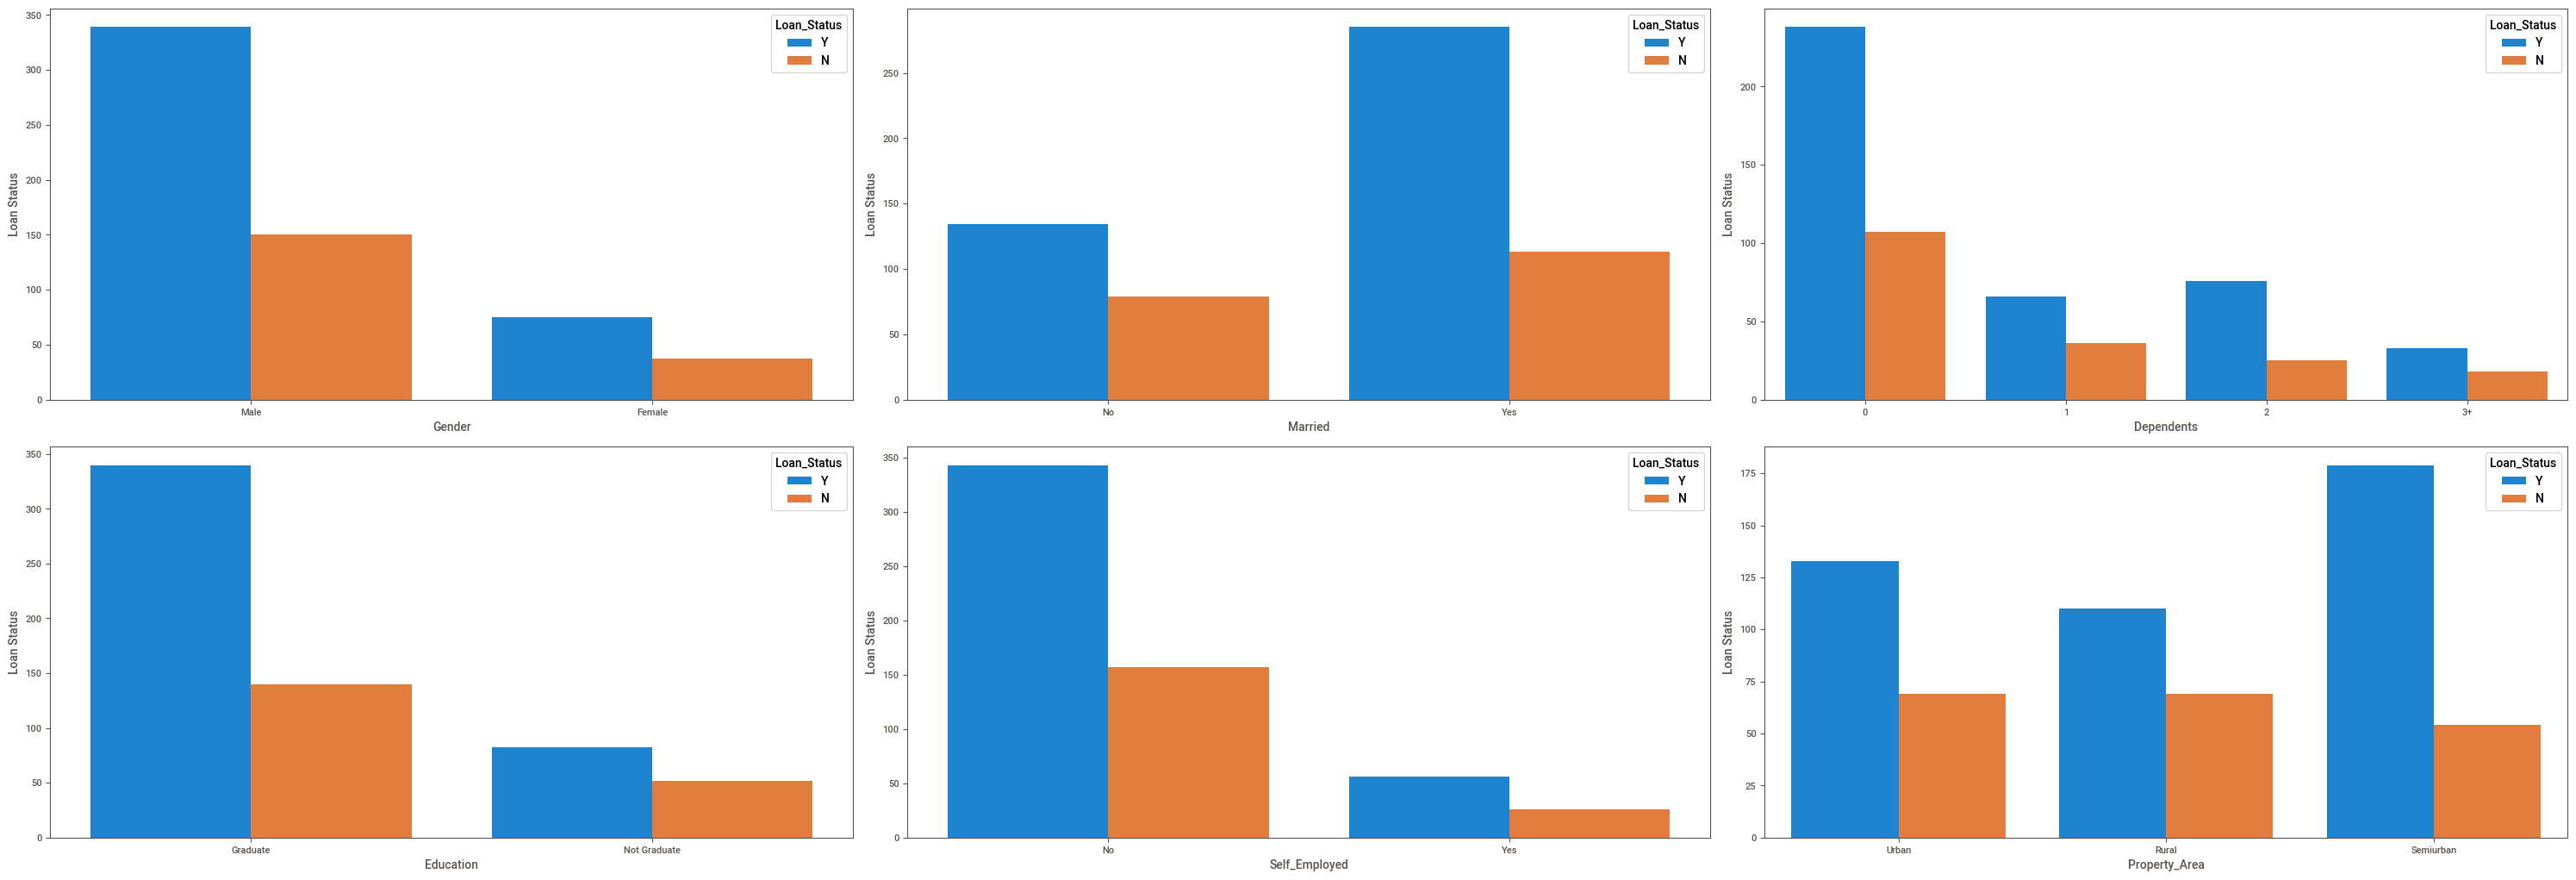

In [47]:
#Countplot
plt.figure(figsize=(30, 15), facecolor='white')
plotnumber=1

for column in df_cat:
    if plotnumber<=6:
        ax = plt.subplot(3, 3, plotnumber)
        sns.countplot(x=df_cat[column], hue=data['Loan_Status'])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Loan Status', fontsize=10)
    plotnumber += 1
plt.tight_layout()

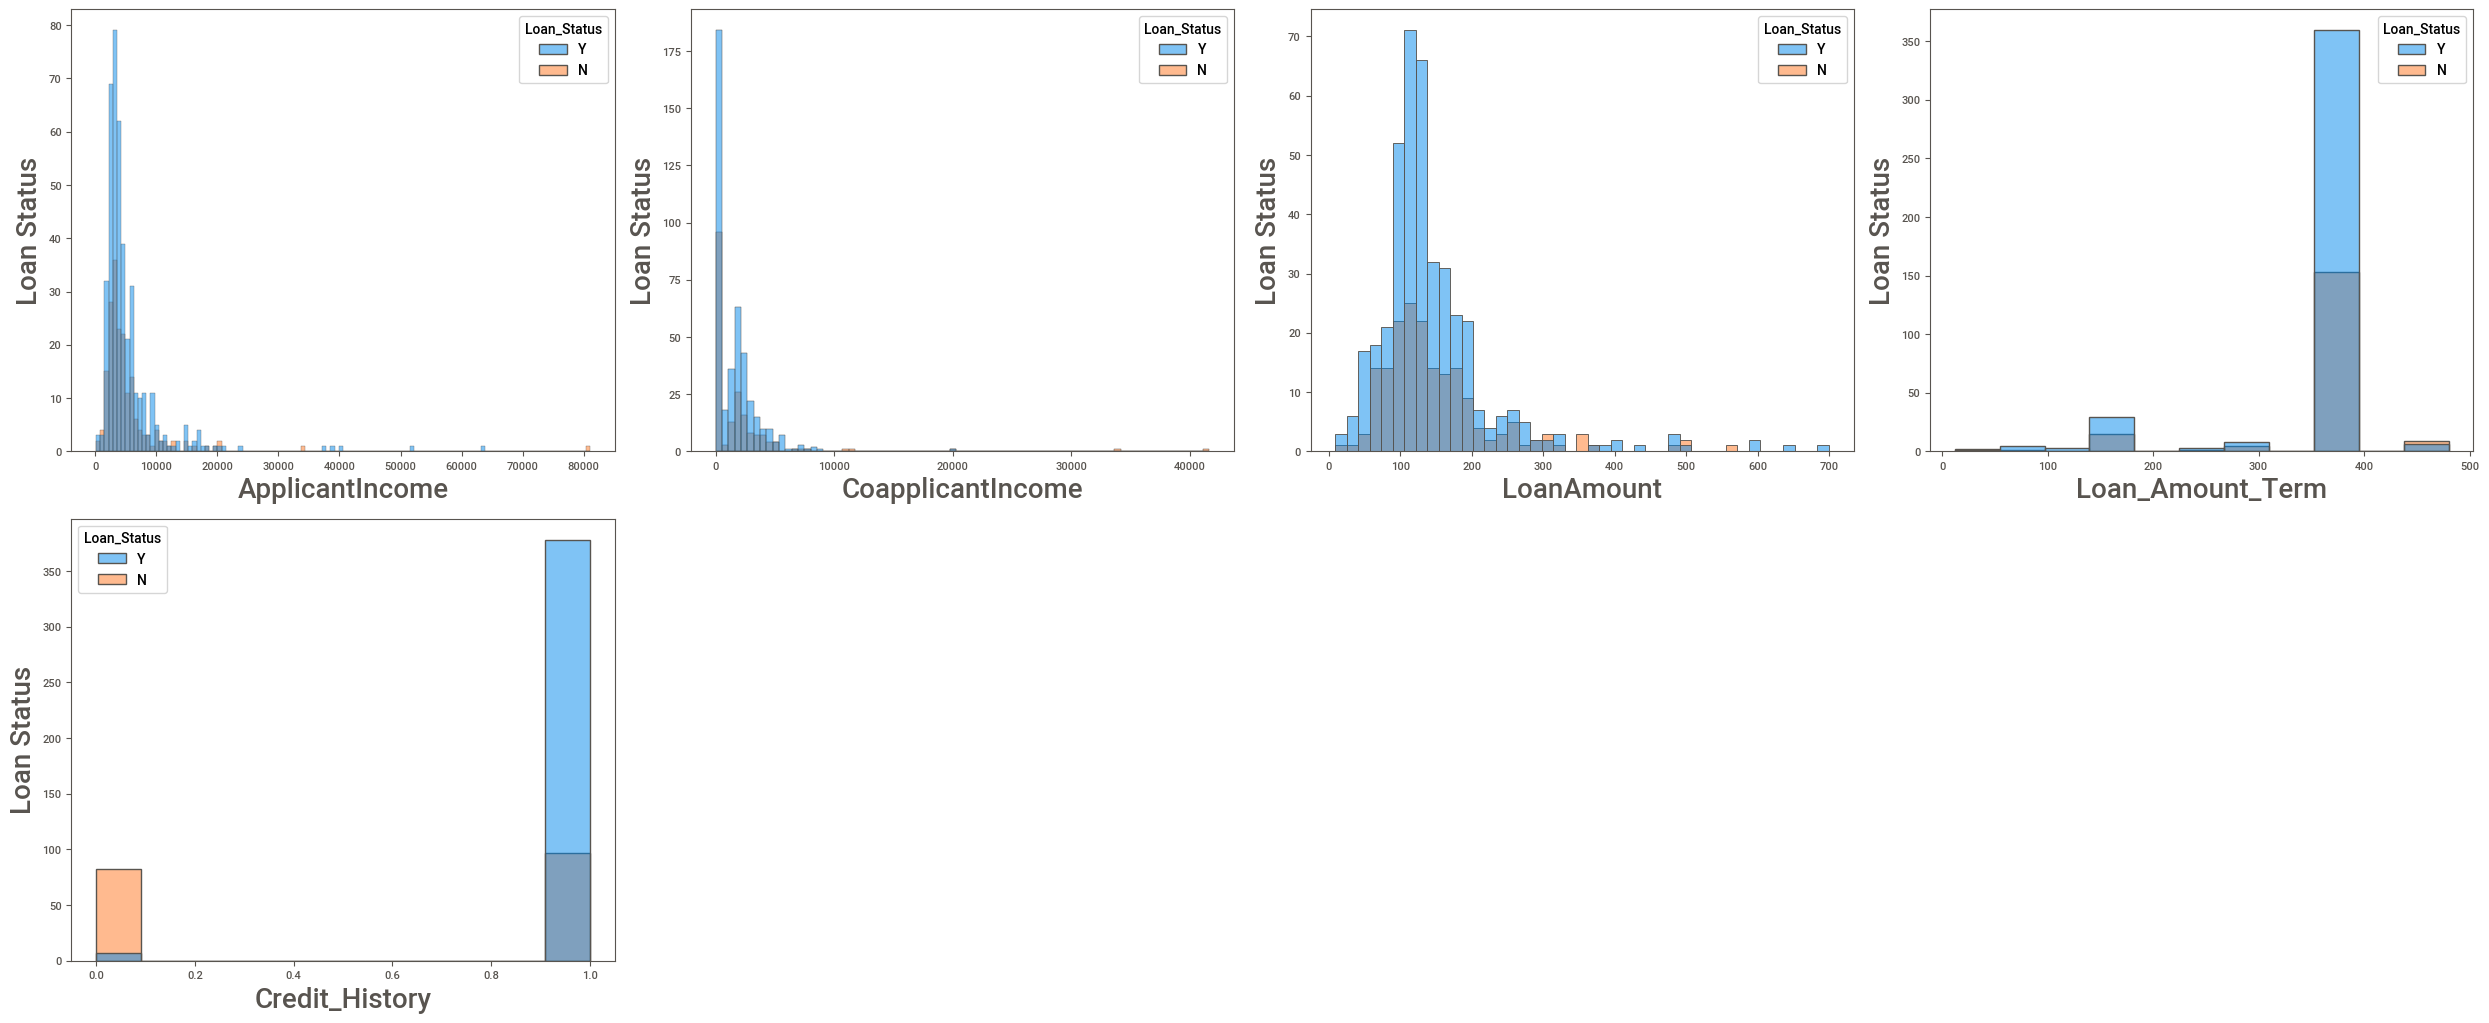

In [60]:
#histplot
plt.figure(figsize=(25, 20))
plotnumber=1

for column in df_num:
    if plotnumber<=16:
        ax=plt.subplot(4, 4, plotnumber)
        sns.histplot(x=df_num[column], hue=data['Loan_Status'])
        plt.xlabel(column, fontsize=20)
        plt.ylabel("Loan Status", fontsize=20)
    plotnumber+=1
plt.tight_layout()

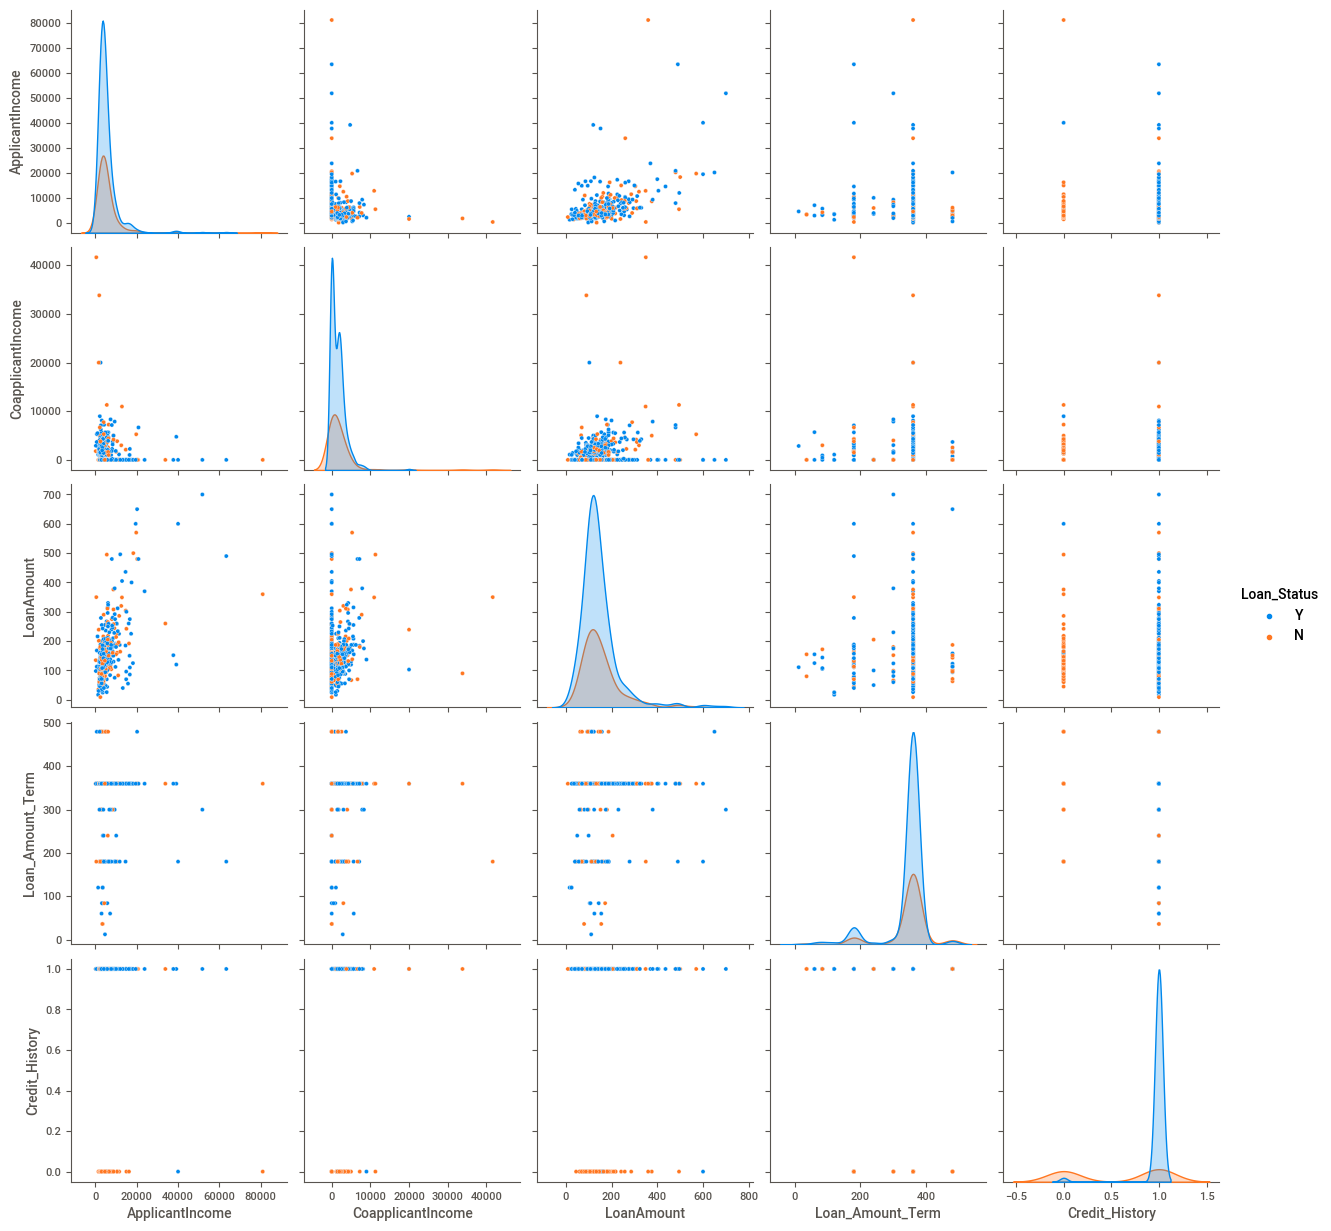

In [61]:
sns.pairplot(data, hue="Loan_Status")

### Data Preprocessing Pipeline

In [69]:
## Checking for missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [70]:
# Checking for missing values percentage
data.isnull().sum()/len(data)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### Handling Missing Values

### Gender
Gender is categorical data hence replace with mode


In [71]:
data['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [72]:
data.loc[data['Gender'].isnull()==True, 'Gender'] = 'Male'

### Married
Married is categorical so we repalce it with mode

In [74]:
data['Married'].mode()

0    Yes
Name: Married, dtype: object

In [75]:
data.loc[data['Married'].isnull()==True, 'Married'] = 'Yes'

In [77]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Dependents
dependents is also categorical so we replace it with mode but here the mode is 0 so we are re

In [80]:
data.loc[data['Dependents'].isnull()==True, 'Dependents'] ='3+'

### Self_Employed
Its also categorical so we are replacing it with mode

In [82]:
data['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [84]:
data.loc[data['Self_Employed'].isnull()==True, 'Self_Employed'] = 'No'

### Loan Amount
Checking if distribution is normal or skewed, we replace it with median if its skewed and mean if its normal

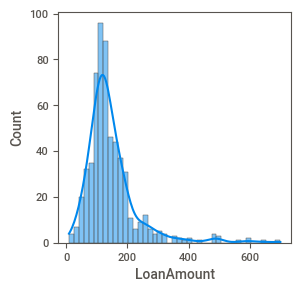

In [87]:
plt.figure(figsize=(3, 3))
sns.histplot(data=data, x='LoanAmount', kde=True)
plt.show()

In [88]:
data['LoanAmount'].median()

128.0

In [90]:
data.loc[data['LoanAmount'].isnull()==True, 'LoanAmount'] = data['LoanAmount'].median()

### Loan Amount Term

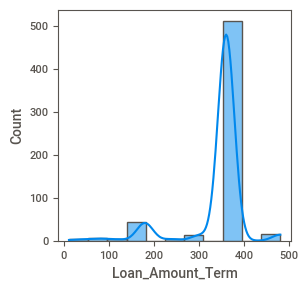

In [91]:
plt.figure(figsize=(3, 3))
sns.histplot(data=data, x="Loan_Amount_Term", kde=True)
plt.show()

In [92]:
data['Loan_Amount_Term'].median()

360.0

In [93]:
data.loc[data['Loan_Amount_Term'].isnull()==True, 'Loan_Amount_Term']=data['Loan_Amount_Term'].median()

### Credit_History

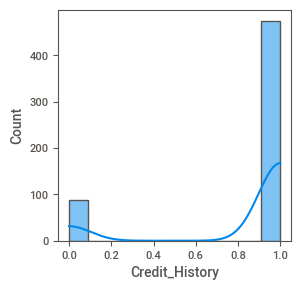

In [94]:
plt.figure(figsize=(3, 3))
sns.histplot(data=data, x="Credit_History", kde=True)
plt.show()

In [98]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

### Checking duplicates
drop the duplicate rows

In [104]:
data.duplicated().sum()

0

### Scaling

In [105]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [108]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = scale.fit_transform(data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])

In [110]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,0.030093,0.056592,0.160637,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.072356,0.000000,0.191027,360.0,1.0,Urban,Y
